# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Project 6')
path = '.'

### Load the "images.npy" file (1 mark)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
data = np.load('images.npy', allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (1 mark)

In [0]:
data.shape

(409, 2)

In [0]:
data[1]

array([array([[[207, 216, 227, 255],
        [206, 216, 227, 255],
        [207, 216, 227, 255],
        ...,
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255]],

       [[207, 216, 227, 255],
        [207, 216, 227, 255],
        [207, 216, 227, 255],
        ...,
        [ 35,  32,  33, 255],
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255]],

       [[207, 216, 227, 255],
        [207, 216, 227, 255],
        [207, 215, 227, 255],
        ...,
        [ 35,  33,  33, 255],
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255]],

       ...,

       [[ 31,  21,  17, 255],
        [ 31,  22,  18, 255],
        [ 31,  22,  18, 255],
        ...,
        [  0,   1,   4, 255],
        [  0,   1,   4, 255],
        [  0,   1,   4, 255]],

       [[ 31,  22,  18, 255],
        [ 31,  22,  18, 255],
        [ 31,  22,  18, 255],
        ...,
        [  0,   1,   4, 255],
        [  0,   1,   4, 255],
        [  0,   1,   4, 255]],

     

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [0]:
X_train.shape

(409, 224, 224, 3)

In [0]:
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.17647058 -0.00392157  0.16078436]
  [-0.11372548  0.082353    0.23921573]
  [-0.09019607  0.11372554  0.25490201]
  ...
  [ 0.05882359  0.13725495  0.30980396]
  [-0.02745098  0.03529418  0.20000005]
  [-0.04313725  0.0196079   0.18431377]]

 [[-0.05098039  0.12156868  0.28627455]
  [-0.09803921  0.09803927  0.26274514]
  [-0.04313725  0.16078436  0.29411769]
  ...
  [ 0.01176476  0.09803927  0.27058828]
  [-0.01176471  0.06666672  0.22352946]
  [-0.03529412  0.02745104  0.19215691]]

 [[-0.06666666  0.13725495  0.27058828]
  [-0.00392157  0.20000005  0.33333337]
  [ 0.04313731  0.24705887  0.38039219]
  ...
  [ 0.02745104  0.11372554  0.27058828]
  [-0.01960784  0.06666672  0.22352946]
  [ 0.00392163  0.06666672  0.21568632]]

 ...

 [[-0.78823531 -0.87450981 -0.81960785]
  [-0.90588236 -1.         -1.        ]
  [-0.63137257 -0.78823531 -0.78823531]
  ...
  [-0.50588238 -0.74117649 -0.66274512]
  [-0.49803919 -0.74901962 -0.66274512]
  [-0.51372552 -0.77254903 -0.7019608 ]]

 [

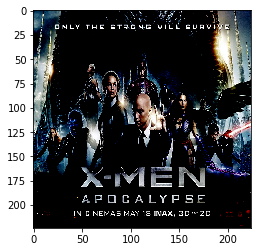

In [0]:
from matplotlib import pyplot
n = -1
print(X_train[n])
pyplot.imshow(X_train[n])

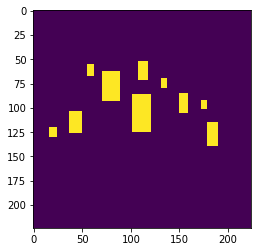

In [0]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    block1 = model.get_layer("input_1").output
    block2 = model.get_layer("conv_pw_1_relu").output
    block3 = model.get_layer("conv_pw_3_relu").output
    block4 = model.get_layer("conv_pw_5_relu").output
    block5 = model.get_layer("conv_pw_11_relu").output
    block6 = model.get_layer("conv_pw_13_relu").output


    x = Concatenate()([UpSampling2D()(block6), block5])
    x = Concatenate()([UpSampling2D()(x), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((224, 224))(x)

    return Model(inputs=model.input, outputs=x)


### Call the create_model function

In [0]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()


# Total params: 3,230,657
# Trainable params: 3,208,769
# Non-trainable params: 21,888

# Total params: 3,230,657
# Trainable params: 1,793
# Non-trainable params: 3,228,864

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
import tensorflow as tf

def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
from tensorflow.keras.optimizers import Adam


# set the first 21 layers to non-trainable (weights will not be updated)
# i.e. the last 7 layers are made trainable as per project requirement in order to detect faces on WIDER Dataset

for layer in model.layers[:21]:
    layer.trainable = False

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=[dice_coefficient])



### Define checkpoint and earlystopping

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [0]:
model.fit(x = X_train,
          y = masks,
          epochs=100,
          batch_size=1,
          callbacks=[checkpoint, reduce_lr, stop],
          workers=1,
          use_multiprocessing=False,
          shuffle=True,
          verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 409 samples
Epoch 1/100
408/409 [============================>.] - ETA: 0s - loss: 1.3743 - dice_coefficient: 0.4368
Epoch 00001: loss improved from inf to 1.37300, saving model to model-1.37.h5
409/409 [==============================] - 35s 86ms/sample - loss: 1.3730 - dice_coefficient: 0.4371
Epoch 2/100
408/409 [============================>.] - ETA: 0s - loss: 0.8099 - dice_coefficient: 0.6048
Epoch 00002: loss improved from 1.37300 to 0.81005, saving model to model-0.81.h5
409/409 [==============================] - 23s 57ms/sample - loss: 0.8101 - dice_coefficient: 0.6045
Epoch 3/100
408/409 [============================>.] - ETA: 0s - loss: 0.6277 - dice_coefficient: 0.6748
Epoch 00003: loss improved from 0.81005 to 0.62788, saving model to model-0.63.h5
409/409 [==============================] - 24s 60ms/sample - loss: 0.6279 - dice_coefficient: 0.6745
Epoch 4/100
408/409 [====

In [0]:
sample_image = X_train[10]
sample_image

array([[[-0.98431373, -0.98431373, -0.98431373],
        [-0.98431373, -0.98431373, -0.98431373],
        [-0.98431373, -0.98431373, -0.98431373],
        ...,
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ]],

       [[-0.98431373, -0.98431373, -0.98431373],
        [-0.98431373, -0.98431373, -0.98431373],
        [-0.98431373, -0.98431373, -0.98431373],
        ...,
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ]],

       [[-0.98431373, -0.98431373, -0.98431373],
        [-0.98431373, -0.98431373, -0.98431373],
        [-0.98431373, -0.98431373, -0.98431373],
        ...,
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ],
        [-1.        , -1.        , -1.        ]],

       ...,

       [[-1.        , -1.        , -1.        ],
        [-1

### Get the predicted mask for a sample image   (3 marks)

In [0]:
n = -1

img = X_train[n]
img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)

feat_scaled = preprocess_input(np.array(img, dtype=np.float32))

region = model.predict(x=np.array([feat_scaled]))[0] # Predict the BBox
x0 = int((region[0]) * image_width / IMAGE_WIDTH) # Scale the BBox
y0 = int((region[1]) * image_height / IMAGE_HEIGHT)

x1 = int((region[2]) * image_width / IMAGE_WIDTH)
y1 = int((region[3]) * image_height / IMAGE_HEIGHT)


TypeError: ignored

### Impose the mask on the image (3 marks)

In [0]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

In [0]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()